In [1]:
import json
import numpy as np
from tqdm import tqdm
from itertools import product
import matplotlib.pyplot as plt

from csc.utils import *
from csc.atoms import *
from csc.workbench import *
from csc.dictionary import *

# Atom parameters
bmin = 0.005
bmax = 0.60
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.01
ymax = 0.034
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 1428 different atoms


### Workbench initialization with a database path

In [2]:
batchSize = 200
path_to_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\data_signals_{batchSize}.json'
path_to_omp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\data_omp_{batchSize}.json'

workbench = CSCWorkbench(path_to_signals_db)
workbench.load_data()
workbench.set_dictionary(dictionary)

In [24]:

metrics_at_step1 = workbench.sortByPositionErrorAtStep(path_to_omp_db, 1, ascending=False)
print(Counter([snr for snr in metrics_at_step1['snr']]))

Counter({15: 600, 10: 600, 0: 600, 5: 600, -5: 600})


        id  snr  sparsity  pos_err  abs_pos_err  algo_step
8332  2133   10         4     -499          499          1
7428  1876   10         3     -403          403          1
9590  2398   10         5     -323          323          1
[2133, 1876, 2398]


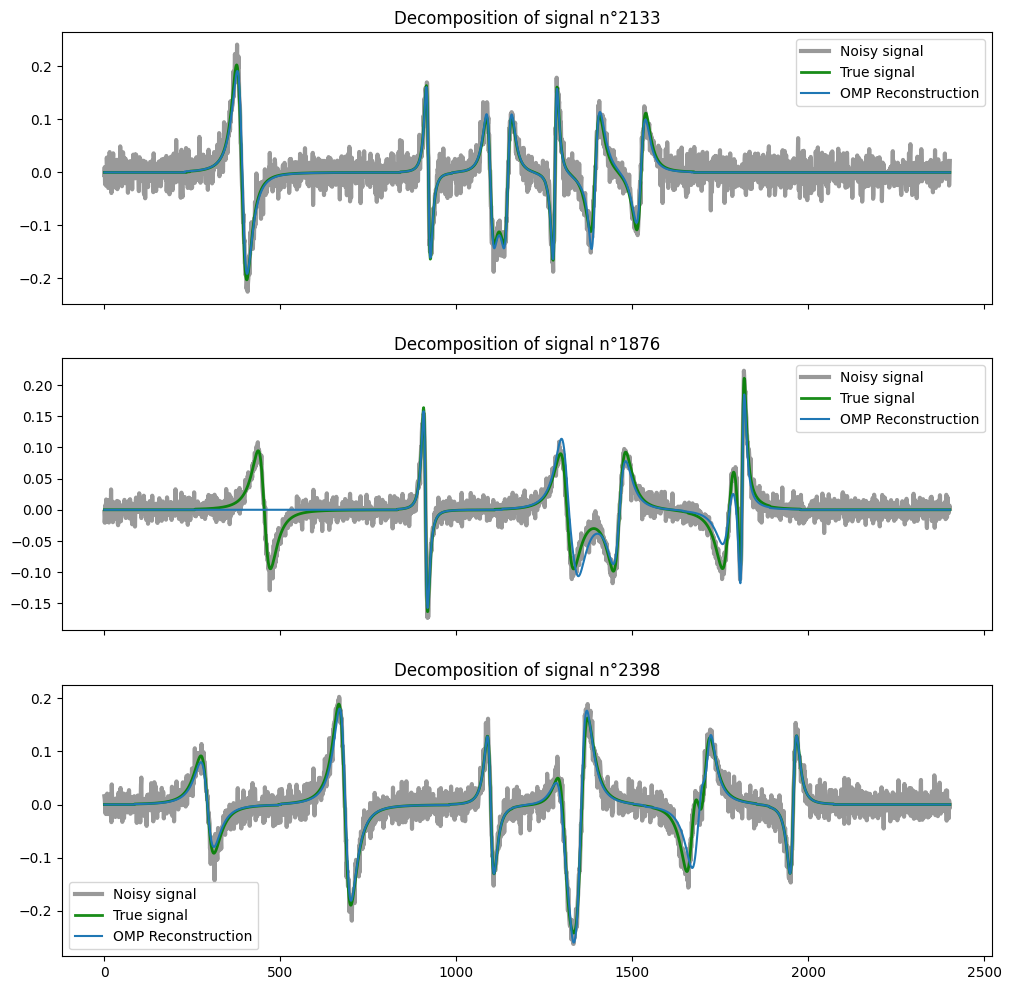

In [35]:
metrics_at_step1 = metrics_at_step1.loc[metrics_at_step1['snr'] == 10]
print(metrics_at_step1.head(3))
ids = [id for id in metrics_at_step1.head(3)['id']]
print(ids)
workbench.plotComparison(db_path=path_to_omp_db, ids=ids)

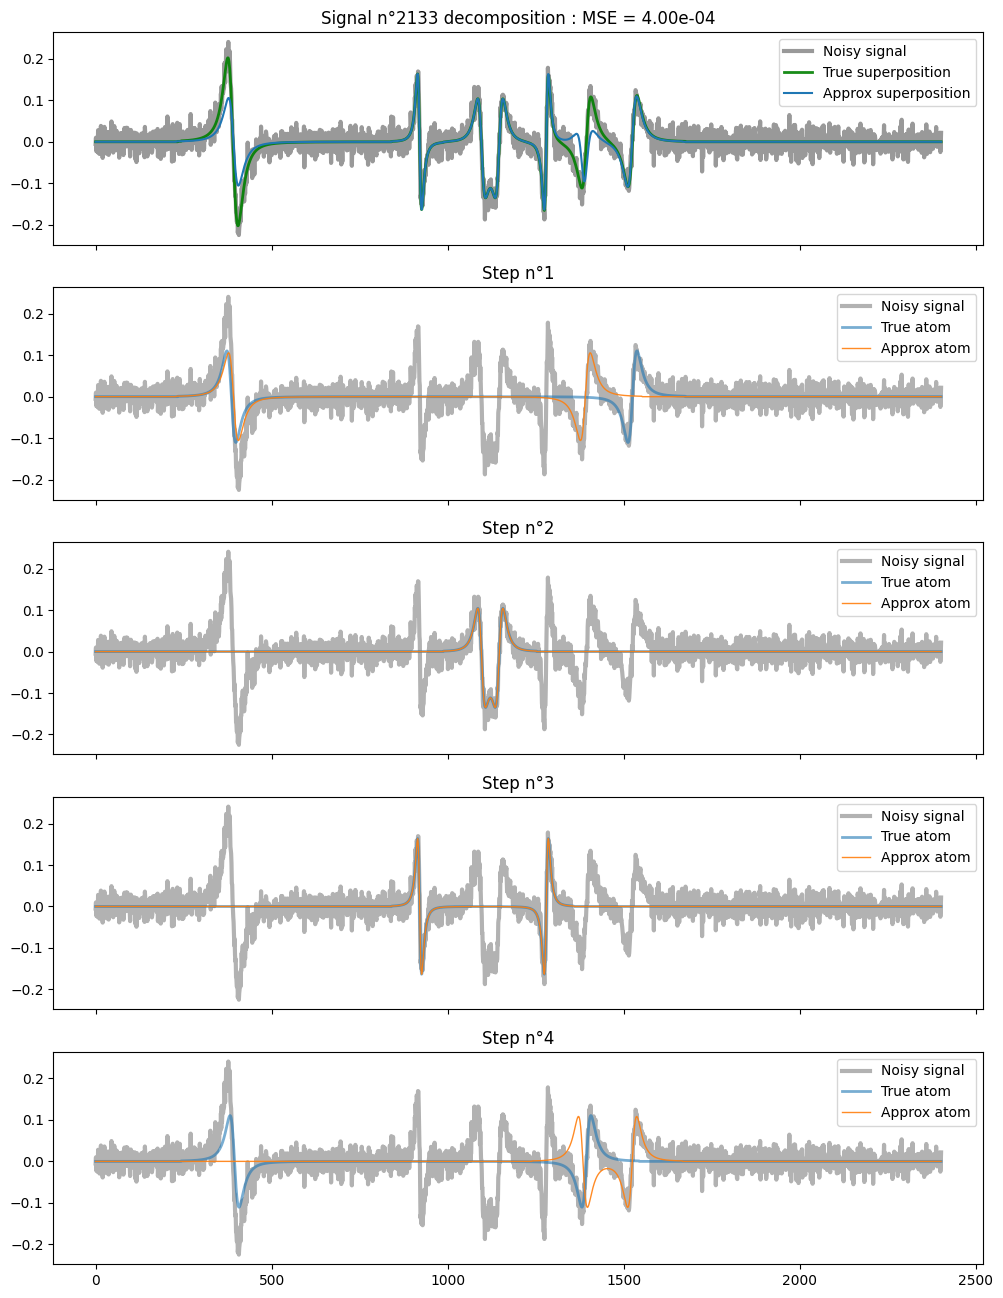

In [39]:
workbench.plotStepDecomposition(db_path=path_to_omp_db, id=ids[0])

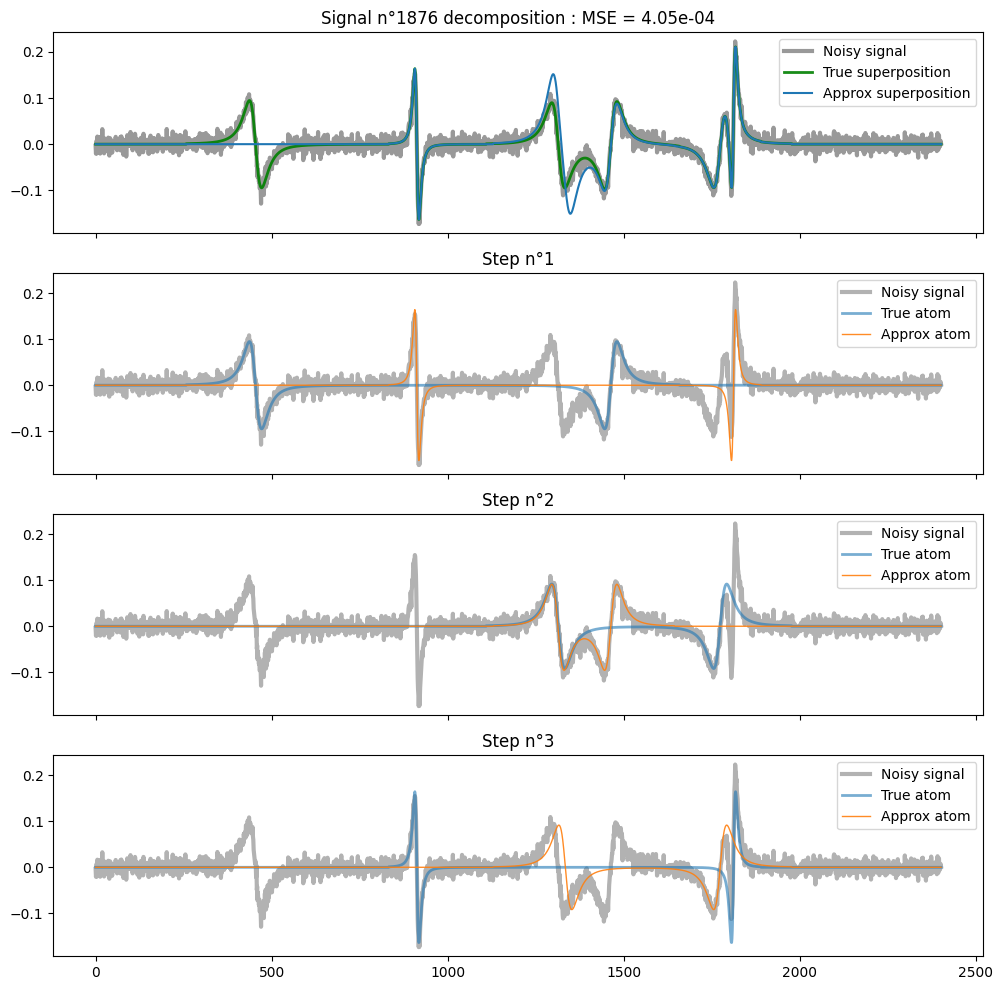

In [40]:
workbench.plotStepDecomposition(db_path=path_to_omp_db, id=ids[1])

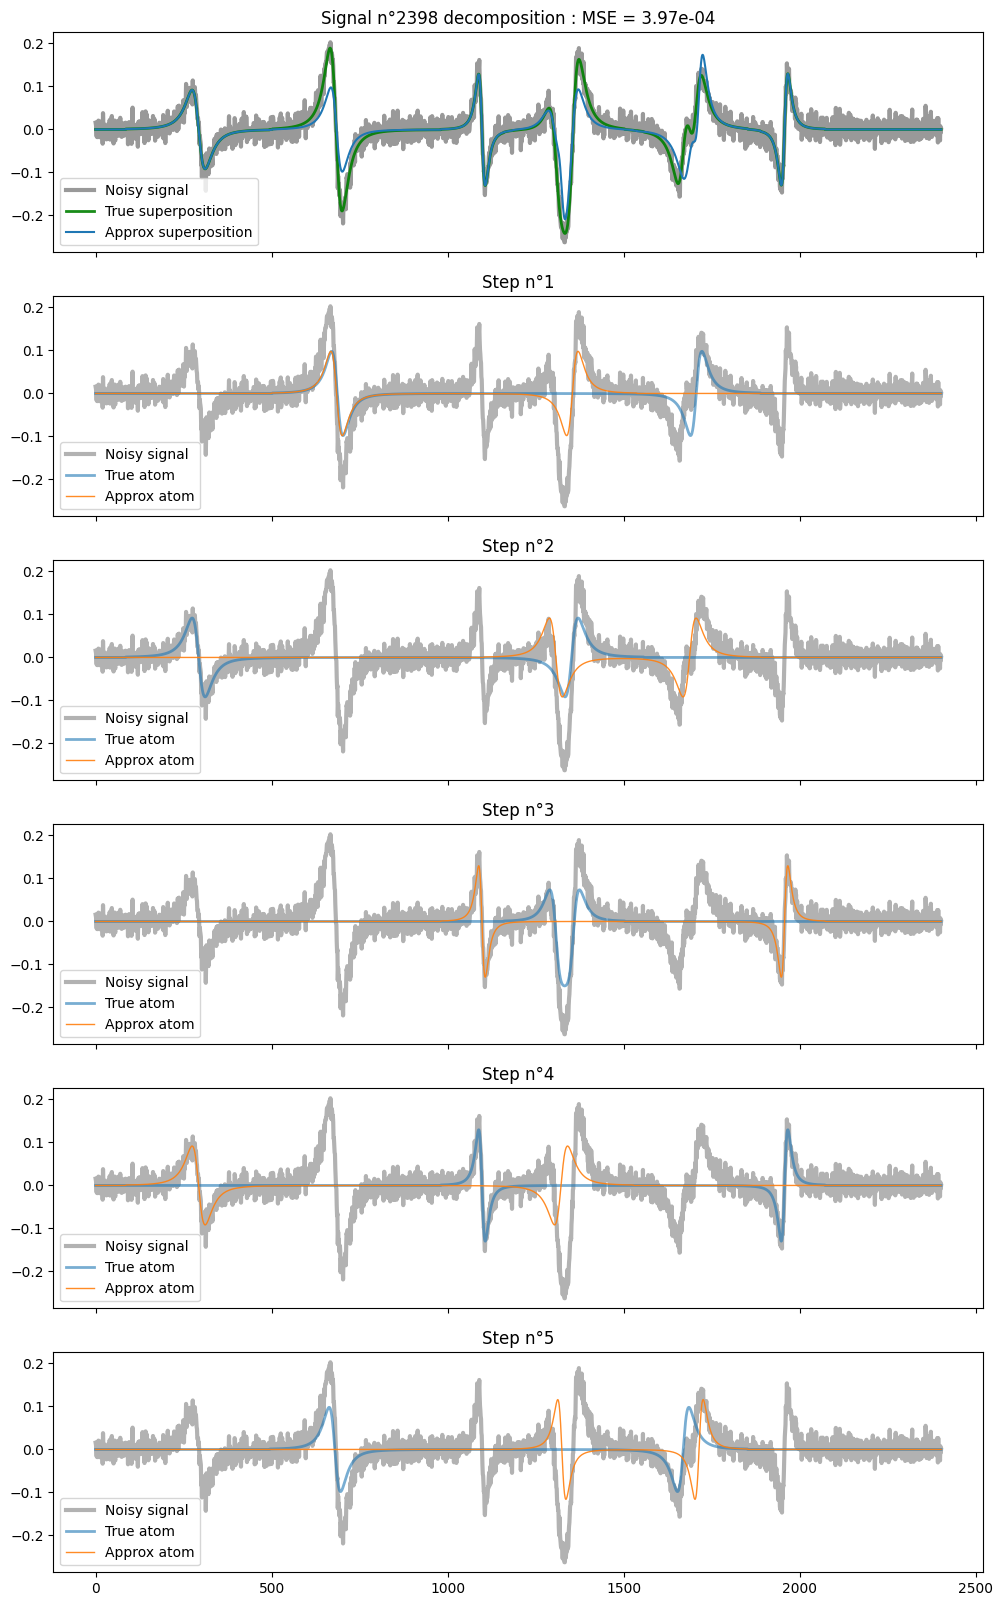

In [41]:
workbench.plotStepDecomposition(db_path=path_to_omp_db, id=ids[2])